Does PCA really maximize mutual information in all cases? Specifically, is the orthogonality requirement always the best?

Some references:
- https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202
- https://arxiv.org/pdf/1404.1100.pdf
- https://en.wikipedia.org/wiki/Principal_component_analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# generate some 2D data
noise = 1
x = np.linspace(0, 10, num=100)
y1 = np.random.normal(x, noise)
y2 = np.random.normal(3 * x, noise)
y3 = np.random.normal(3 * x, noise)
y4 = np.random.normal(3 * x, noise)

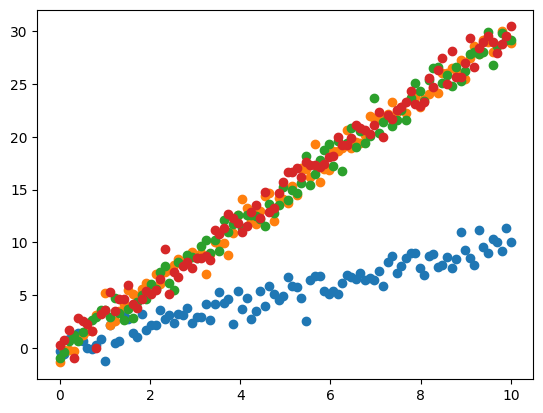

In [16]:
plt.figure()
plt.scatter(x, y1)
plt.scatter(x, y2)
plt.scatter(x, y3)
plt.scatter(x, y4)
plt.show()

In [17]:
X = np.vstack((y1, y2, y3, y4))
mu = X.mean(axis=0, keepdims=True)
Xc  = X - mu

C = Xc @ Xc.T
U, S, V = np.linalg.svd(C)

Xhat = mu + V @ V.T @ Xc

In [19]:
V.shape

(4, 4)

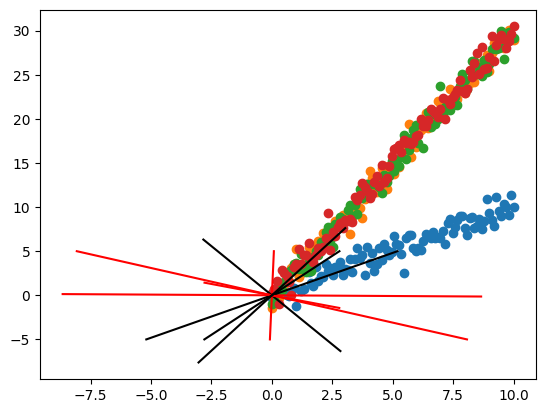

In [20]:
# eigenvectors

ev1, ev2, ev3, ev4 = V.T

t = np.linspace(-10, 10)

plt.figure()
plt.scatter(x, y1)
plt.scatter(x, y2)
plt.scatter(x, y3)
plt.scatter(x, y4)
plt.plot(*ev1[:, None]*t, c="red")
plt.plot(*ev2[:, None]*t, c="k")
plt.plot(*ev3[:, None]*t, c="red")
plt.plot(*ev4[:, None]*t, c="k")
plt.show()

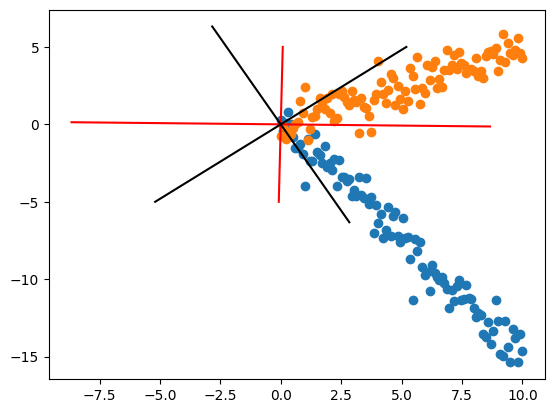

In [21]:
plt.figure()
plt.scatter(x, Xc[0])
plt.scatter(x, Xc[1])
plt.plot(*ev1[:, None]*t, c="red")
plt.plot(*ev2[:, None]*t, c="k")
plt.show()

In [22]:
print(S)

[9.98662560e+03 9.41850780e+01 8.18026181e+01 2.10190829e-13]


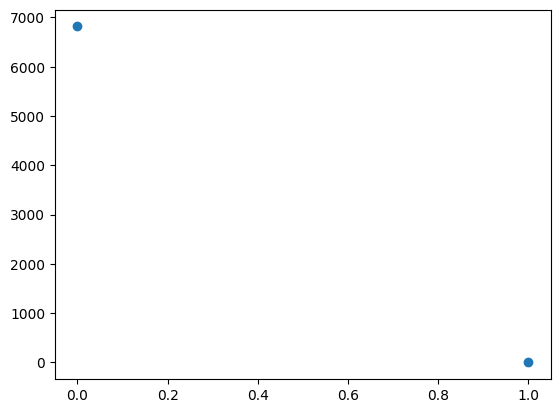

In [46]:
X1 = X

# Sky map

In [2]:
import healpy as hp

In [3]:
X = np.load("../../ulsa_sky_32_kelvin.npy")
print(X.shape)

(50, 12288)


In [20]:
freq = np.linspace(1, 50, 50)

## Reduce frequency dimension

We want to maximize spectral variance, i.e. find eigenvectors of $\mathbf{X}\mathbf{X}^T$. These are the Princial Component loadings of $\mathbf{X}^T$.

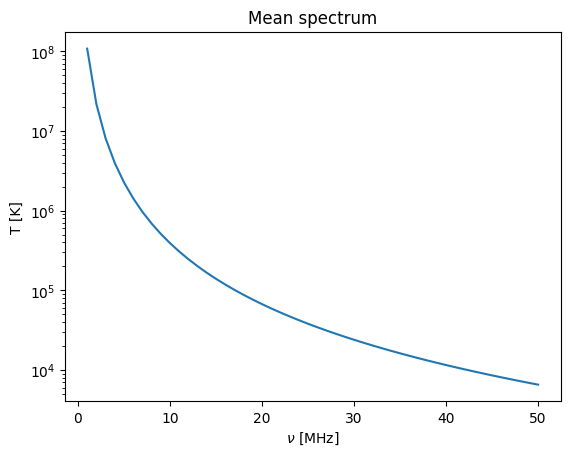

In [23]:
# PCA of X^T

# give all 50 cols of X.T mean = 0 
mu = X.mean(axis=1)
Xc = X - mu[:, None]

plt.figure()
plt.plot(freq, mu)
plt.yscale("log")
plt.xlabel("$\\nu$ [MHz]")
plt.ylabel("T [K]")
plt.title("Mean spectrum")
plt.show()

In [24]:
U, S, Vt = np.linalg.svd(Xc)

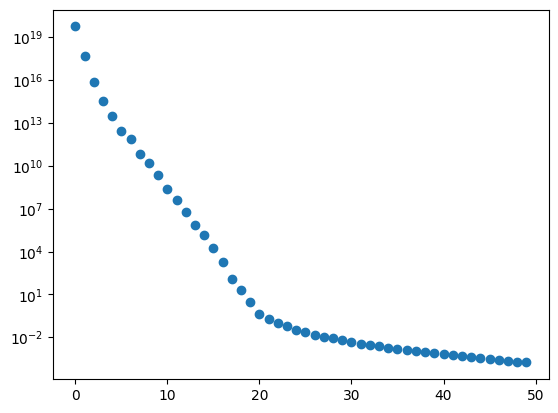

In [31]:
plt.figure()
plt.scatter(np.arange(S.size), S**2)
plt.yscale("log")
plt.show()

In [41]:
Smat = np.zeros((U.shape[-1], Vt.shape[0]))
Smat[:, :U.shape[-1]] = S

In [32]:
# principal components
pc_f = Xc.T @ U

In [44]:
np.allclose(pc_f.T, Smat@Vt.T)

False